## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

%matplotlib inline


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20,50)
y = -2*x+1
x = x[:,np.newaxis]
y = y[:,np.newaxis]



#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [3]:
def initialize_weights(col_dim,row_dim=1):
    return np.random.normal(size=(row_dim,col_dim))*0.01

In [4]:
def initialize_bias(weights_array):
    return np.insert(weights_array,0,0)

In [5]:
def initialize_theta(features_number):
    weights = initialize_weights(features_number)
    return initialize_bias(weights).reshape([-1,1])

In [6]:
def predict(input_data,weights):
    return np.matmul(input_data,weights)

In [7]:
def calc_mean_square_error(sample_number,output,predicted):
    return (1/(2*sample_number))*np.sum(np.power((predicted-output),2))

In [8]:
def calc_gradient(number_of_samples,predicted,output,input):
    return (1/number_of_samples)*np.sum((predicted-output)*input)

In [9]:
def calc_new_weights(weights,d_theta,lr):
    return (weights - (lr*d_theta))

In [10]:
def split_data(training_data,real_output,samples_number,batches):
    samples_per_batch = samples_number//batches
    data_batches = {}
    batch_data ={}
    current_batch_start_index = 0
    current_batch_end_index = samples_per_batch
    for batch in range(1,batches+1):
        batch_data["training_batch_data"] = training_data[current_batch_start_index:current_batch_end_index]
        batch_data["real_output"] = real_output[current_batch_start_index:current_batch_end_index]
        data_batches[batch] = batch_data.copy()
        current_batch_start_index += samples_per_batch
        if batch == batches:
            current_batch_end_index = len(training_data)
        else:
            current_batch_end_index += samples_per_batch
    return data_batches

In [11]:
def prepare_theta_history(theta_matrix):
    theta_dict = {}
    for _,matrix in theta_matrix.items():
        for index,theta in enumerate(matrix):
            if "theta_"+str(index) in theta_dict.keys():
                theta_dict["theta_"+str(index)].append(theta)
            else:
                theta_dict["theta_"+str(index)] = [theta]
    return theta_dict

In [12]:
def solve_using_gradient_descent(training_data,real_output,epochs,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data_batch,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix = calc_new_weights(theta_matrix,d_theta,lr)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    predicted_output = predict(training_data,theta_matrix)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

In [13]:
def print_theta(fig,cost_history,theta_history):
    index = 413
    for key,value in theta_history.items():
        ax = fig.add_subplot(index)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.plot(value,np.array(list(cost_history.values())).flatten(),"-r",label="predicted output")
        ax.set_xlabel("loss")
        ax.set_ylabel(key)
        ax.grid()
        ax.legend()
        index += 1

In [14]:
def prepare_input_data_for_training(data):
    if len(data.shape)<2:
        data = data[:,np.newaxis]
    return np.insert(data,0,1,axis=1)

In [15]:
def print_graph(fig,raw_input_data,predicted_output,raw_output_data):
    ax1 = fig.add_subplot(411)
    ax1.xaxis.label.set_color('white')
    ax1.yaxis.label.set_color('white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.plot(raw_input_data,raw_output_data,"bo",label="true output")
    ax1.plot(raw_input_data,predicted_output,"-r",label="predicted output")
    ax1.set_xlabel("input")
    ax1.set_ylabel("output")
    ax1.grid()
    ax1.legend()

In [16]:
def print_debug_graph(fig,history):
    ax2 = fig.add_subplot(412)
    ax2.xaxis.label.set_color('white')
    ax2.yaxis.label.set_color('white')
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.plot(np.array(list(history.values())).flatten(),"-bo",label="true output")
    ax2.set_xlabel("Batches")
    ax2.set_ylabel("Cost")
    ax2.grid()
    ax2.legend()

Epoch:1 of 100, Batch: 1
Cost: 248.18309880918275, Gradient: 277.4352211779654
R2 Score: -1.5538324302603592
Epoch:2 of 100, Batch: 1
Cost: 177.2046992425556, Gradient: 234.24025582354284
R2 Score: -0.8246381680694177
Epoch:3 of 100, Batch: 1
Cost: 126.60754635583717, Gradient: 197.77048211583246
R2 Score: -0.3048299758100308
Epoch:4 of 100, Batch: 1
Cost: 90.53922281130828, Gradient: 166.97882889008383
R2 Score: 0.06571676427007567
Epoch:5 of 100, Batch: 1
Cost: 64.82781635677027, Gradient: 140.9812475512583
R2 Score: 0.3298620559923692
Epoch:6 of 100, Batch: 1
Cost: 46.49936754338663, Gradient: 119.03133045802262
R2 Score: 0.5181587743064253
Epoch:7 of 100, Batch: 1
Cost: 33.433880966492936, Gradient: 100.4988810689562
R2 Score: 0.6523866225359484
Epoch:8 of 100, Batch: 1
Cost: 24.120111905668892, Gradient: 84.85182058579156
R2 Score: 0.7480713237970582
Epoch:9 of 100, Batch: 1
Cost: 17.480765287551073, Gradient: 71.64091162152617
R2 Score: 0.8162804337261118
Epoch:10 of 100, Batch: 

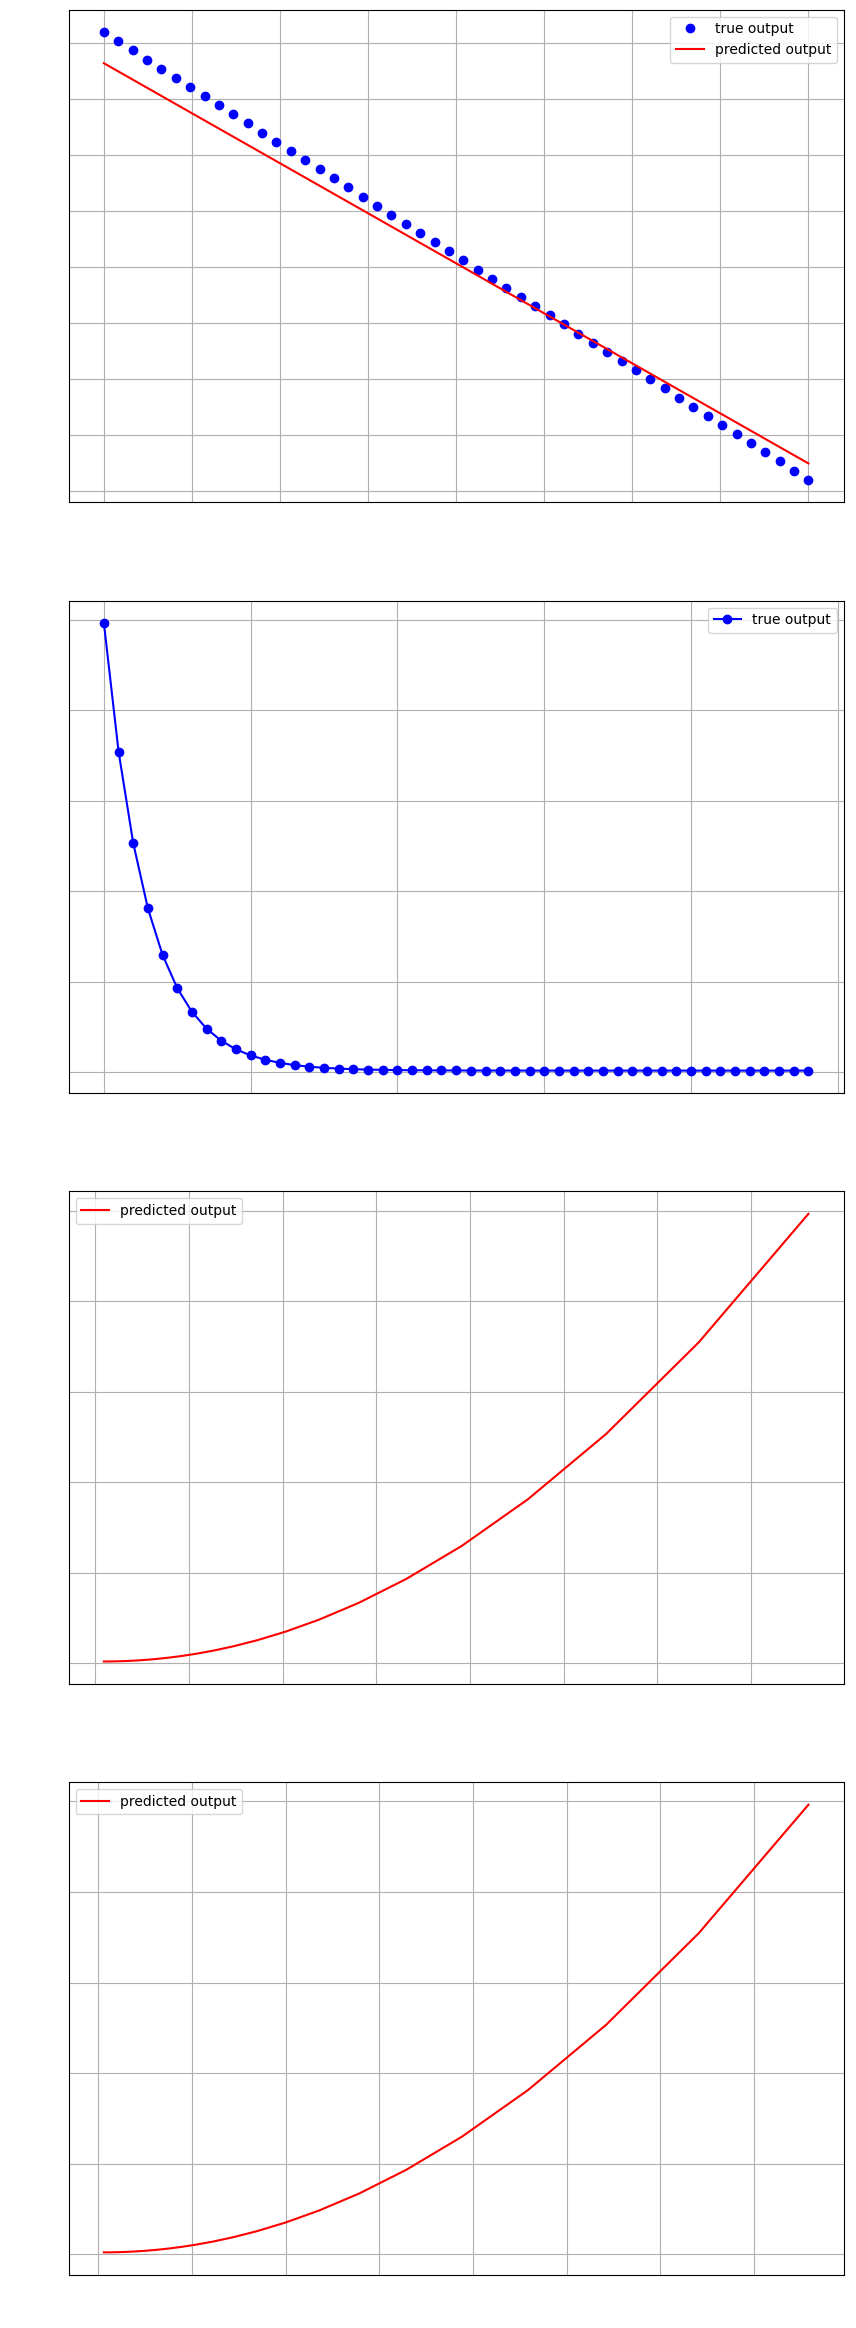

In [17]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_gradient_descent(prepared_input_data,raw_output_data,100,0.001,1)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])




#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

#### Plot all regression lines till converge

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

Epoch:1 of 100, Batch: 1
Cost: 0.863088584736405, Gradient: 1.8102284307781265
Epoch:1 of 100, Batch: 2
Cost: 11.703645440992439, Gradient: 18.78960851415714
Epoch:1 of 100, Batch: 3
Cost: 38.15052704033374, Gradient: 51.73618357835799
Epoch:1 of 100, Batch: 4
Cost: 76.05536616046159, Gradient: 98.15467445533257
Epoch:1 of 100, Batch: 5
Cost: 116.55850520571602, Gradient: 152.61496873505322
Epoch:1 of 100, Batch: 6
Cost: 147.0996852619622, Gradient: 206.407272629381
Epoch:1 of 100, Batch: 7
Cost: 155.9256013086994, Gradient: 248.5146291045333
Epoch:1 of 100, Batch: 8
Cost: 138.56699320537084, Gradient: 268.2227805342792
Epoch:1 of 100, Batch: 9
Cost: 101.73943886023551, Gradient: 258.9258135022807
Epoch:1 of 100, Batch: 10
Cost: 60.233489550384654, Gradient: 221.61467732461367
R2 Score: 0.9105728992357048
Epoch:2 of 100, Batch: 1
Cost: 2.3327840458901075, Gradient: -3.735437078513526
Epoch:2 of 100, Batch: 2
Cost: 0.7202980131353248, Gradient: -4.349664664113644
Epoch:2 of 100, Batch: 

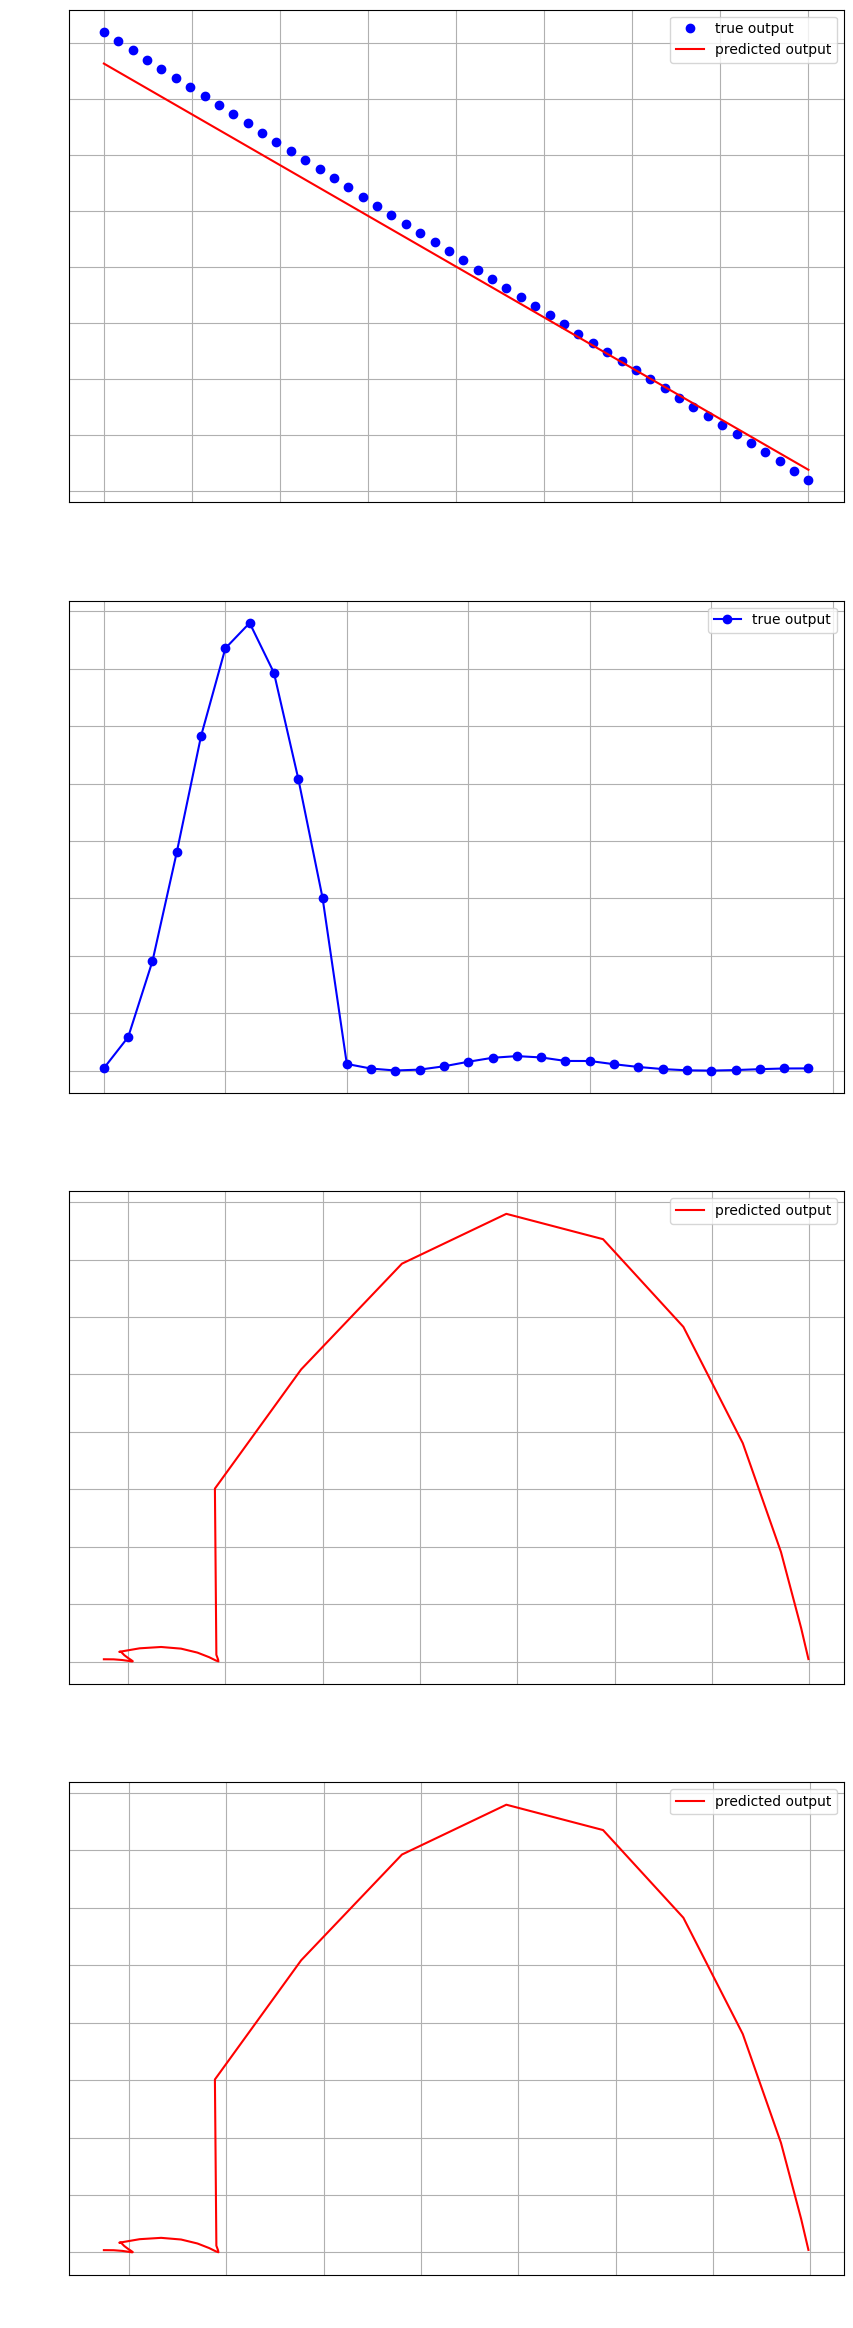

In [18]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_gradient_descent(prepared_input_data,raw_output_data,100,0.001,10)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])



## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

Epoch:1 of 100, Batch: 1
Cost: 0.5, Gradient: -1.0
Epoch:1 of 100, Batch: 2
Cost: 0.01708215704131958, Gradient: -0.26027914031266763
Epoch:1 of 100, Batch: 3
Cost: 0.19832460535850088, Gradient: 1.1439241371367697
Epoch:1 of 100, Batch: 4
Cost: 1.0389994793614103, Gradient: 3.2066612278424738
Epoch:1 of 100, Batch: 5
Cost: 2.524252837441545, Gradient: 5.9152765657687825
Epoch:1 of 100, Batch: 6
Cost: 4.62504269854472, Gradient: 9.24832449678465
Epoch:1 of 100, Batch: 7
Cost: 7.2945888102230665, Gradient: 13.17364725875526
Epoch:1 of 100, Batch: 8
Cost: 10.465636920122586, Gradient: 17.646702085103104
Epoch:1 of 100, Batch: 9
Cost: 14.04887285357149, Gradient: 22.609239008875996
Epoch:1 of 100, Batch: 10
Cost: 17.932819043725278, Gradient: 27.988439385788844
Epoch:1 of 100, Batch: 11
Cost: 21.985498887329335, Gradient: 33.69662674989572
Epoch:1 of 100, Batch: 12
Cost: 26.058056101711923, Gradient: 39.631654683572265
Epoch:1 of 100, Batch: 13
Cost: 29.990366325587157, Gradient: 45.67805

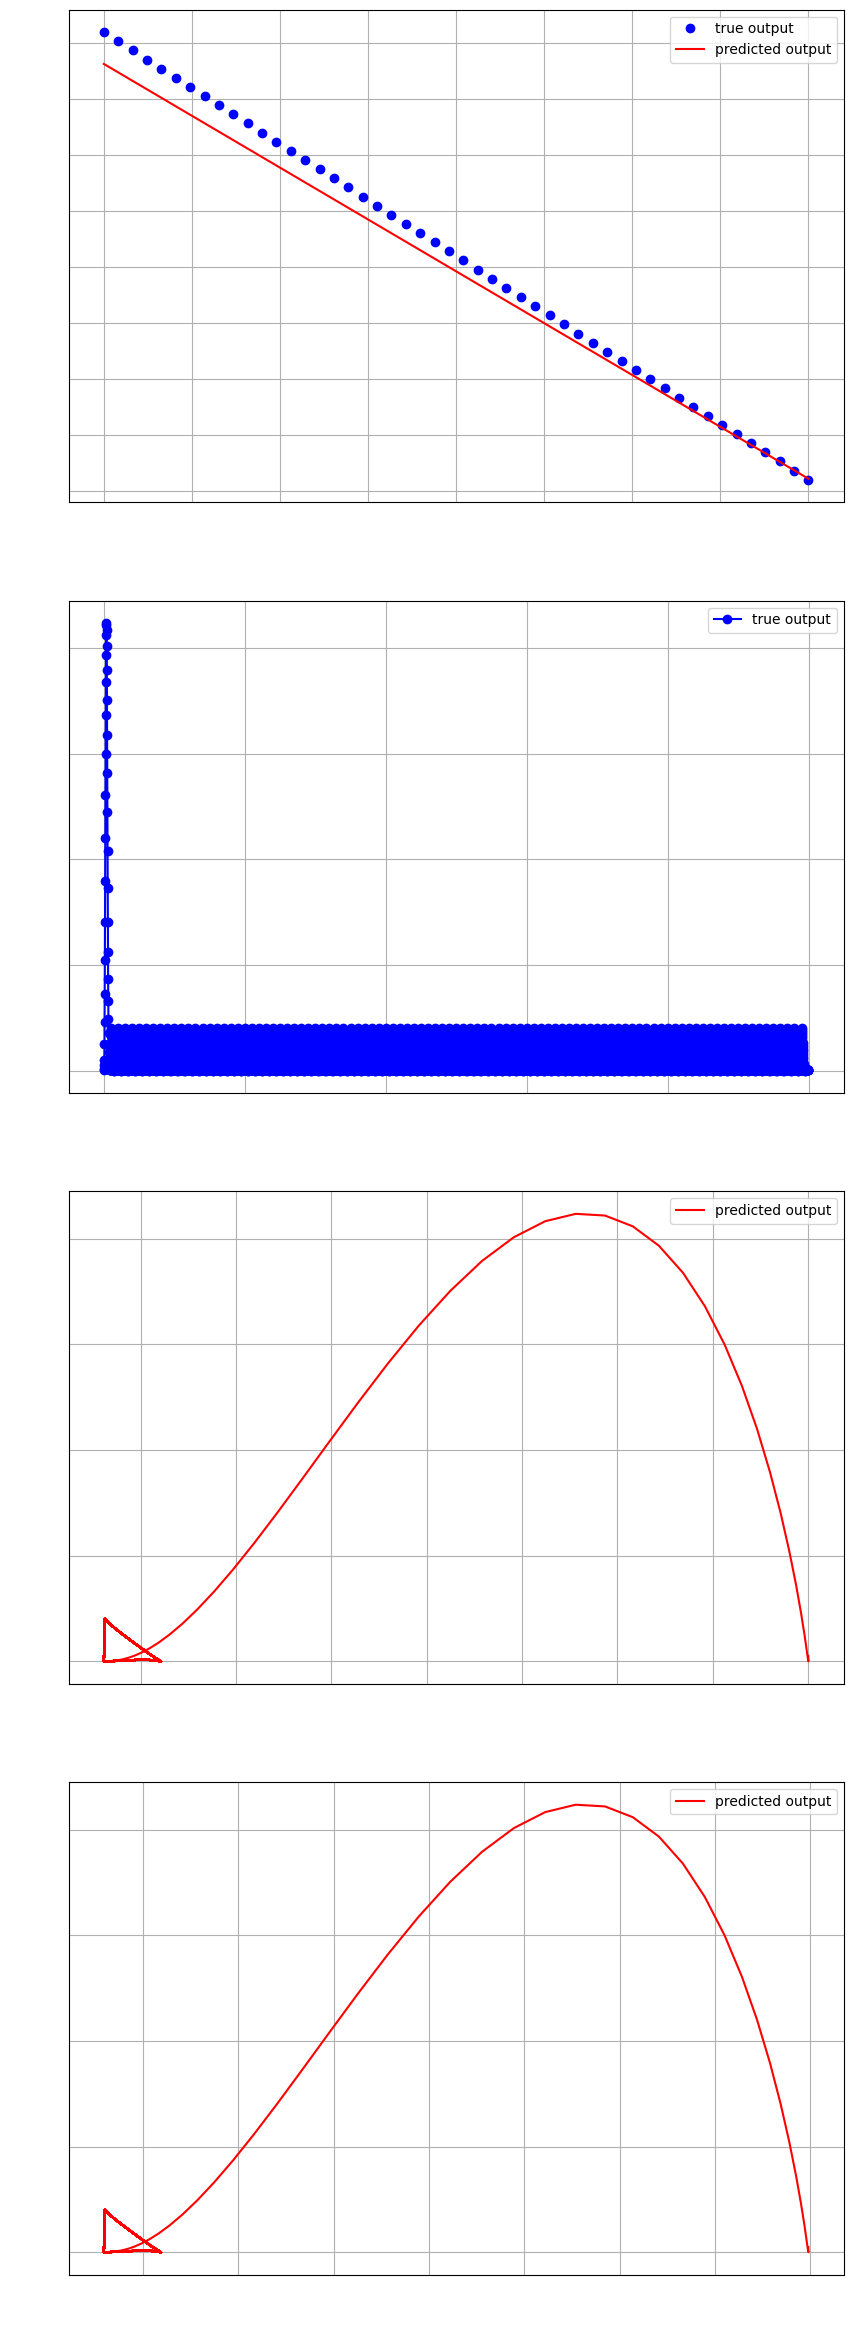

In [19]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_gradient_descent(prepared_input_data,raw_output_data,100,0.001,50)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])
